### Loading the super-tensor

Testing the class __super_tensor__ to load the super-tensor, and compute the cortical temporal networks.

In [1]:
import numpy             as     np
import matplotlib.pyplot as     plt
from   GDa.super_tensor  import super_tensor

Define parameters to instantiate class __super_tensor__, *freqs*, and *delta* should be the same used on __spectral_analysis__ class to compute pairwise coherences. Here, we will define the parameter __trial_subset__ as 10, therefore only ten trials will be loaded in order to save time.

In [2]:
# Frequency axis used to compute coherence
freqs = np.arange(4,60,2)
# Delta used to downsample time in coherence computation
delta = 15
# Intantiating supe_tensor class
st = super_tensor(raw_path = 'GrayLab/', monkey = 'lucy', 
                  date = '150128', session = 1, delta = delta, freqs = freqs, trial_subset = 100)

Next we use the method __load_super_tensor__ to load the coherence matrices, it can take a long time depending on the number of trial and pairs in the session, we can measure the loading time by calling the time module.

The super-tensor has dimensions [Number of pairs, Number of frequency bands, Number of trials, Time]. However, we can average the super tensor in the bands of interest, for instance:

- $\theta$  = [4,8[    Hz;
- $\alpha$  = [8,15[   Hz;
- $\beta$   = [15,30[ Hz;
- $\gamma$  = [30,60[ Hz;

using the parameter __bands__ and __average_bands=True__, in this case Number of frequency bands=len(bands).

In [3]:
# Frequency bands to be averaged
bands = np.array([[4,8],[8,15],[15,30],[30,60]])

import time

start = time.time()
st.load_super_tensor(bands = bands, average_bands=True)
end = time.time()

print('Elapsed time to load super-tensor: ' +str((end - start)/60) + ' min.' )

Trial = 0/540
Trial = 1/540
Trial = 2/540
Trial = 3/540
Trial = 4/540
Trial = 5/540
Trial = 6/540
Trial = 7/540
Trial = 8/540
Trial = 9/540
Trial = 10/540
Trial = 11/540
Trial = 12/540
Trial = 13/540
Trial = 14/540
Trial = 15/540
Trial = 16/540
Trial = 17/540
Trial = 18/540
Trial = 19/540
Trial = 20/540
Trial = 21/540
Trial = 22/540
Trial = 23/540
Trial = 24/540
Trial = 25/540
Trial = 26/540
Trial = 27/540
Trial = 28/540
Trial = 29/540
Trial = 30/540
Trial = 31/540
Trial = 32/540
Trial = 33/540
Trial = 34/540
Trial = 35/540
Trial = 36/540
Trial = 37/540
Trial = 38/540
Trial = 39/540
Trial = 40/540
Trial = 41/540
Trial = 42/540
Trial = 43/540
Trial = 44/540
Trial = 45/540
Trial = 46/540
Trial = 47/540
Trial = 48/540
Trial = 49/540
Trial = 50/540
Trial = 51/540
Trial = 52/540
Trial = 53/540
Trial = 54/540
Trial = 55/540
Trial = 56/540
Trial = 57/540
Trial = 58/540
Trial = 59/540
Trial = 60/540
Trial = 61/540
Trial = 62/540
Trial = 63/540
Trial = 64/540
Trial = 65/540
Trial = 66/540
Trial

Let's plot the first trial of the supertensor for each band:

Text(0.5, 0, 'Time (s)')

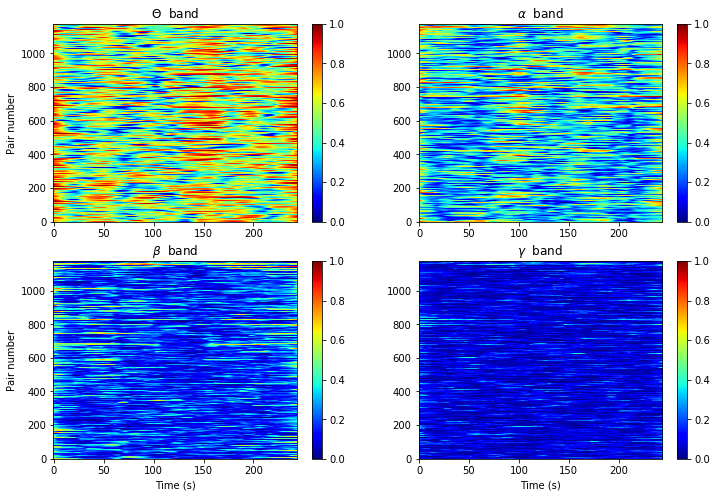

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(st._super_tensor[:,0,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(st._super_tensor[:,1,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(st._super_tensor[:,2,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(st._super_tensor[:,3,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

In [5]:
st.save_npy()

In [6]:
st._super_tensor.shape

(1176, 4, 100, 244)

In [8]:
import time

start = time.time()
np.load('super_tensors/lucy_session01_150128.npy', allow_pickle=True).item()
end = time.time()
print('Elapsed time to load super-tensor: ' +str((end - start)/60) + ' min.' )

Elapsed time to load super-tensor: 0.12121014595031739 min.


Here we will apply NNTF to the supertensor in alpha band in order to try to cluster different temporal network patterns.

In [9]:
from sklearn.decomposition import NMF

In [15]:
# Data for alpha band
X = st._super_tensor[:,1,:,:]
X = X.reshape([1176, 100*244])

In [28]:
start = time.time()

model = NMF(n_components=5, random_state=0)
W = model.fit_transform(X)
H = model.components_

end = time.time()
print('Elapsed time to compute NNTF: ' +str((end - start)/60) + ' min.' )

Elapsed time to compute NNTF: 2.7370978752772013 min.


In [30]:
W.shape

(1176, 5)

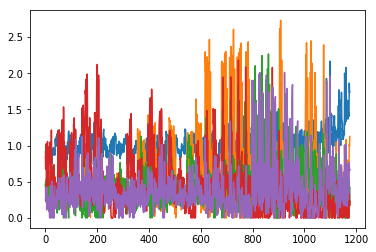

In [31]:
for i in range(5):
    plt.plot(W[:,i])

In [27]:
np.linalg.norm(X-np.matmul(W,H))

778.3399753361198

In [32]:
X.shape

(1176, 24400)

In [36]:
madj = np.zeros([49,49,24400])
for i in range(st.pairs.shape[0]):
    ch1, ch2 = st.pairs[i,0], st.pairs[i,1]
    madj[ch1, ch2,:]=X[i,:]

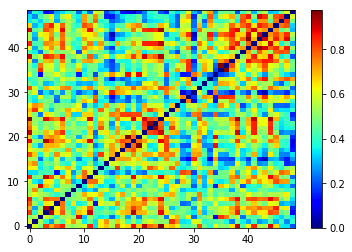

In [40]:
plt.imshow(madj[:,:,0]+madj[:,:,0].T, aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()

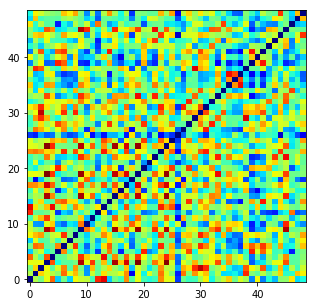

In [52]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(5,5))
ims = []
for i in range(244):
    im = plt.imshow(madj[:,:,i]+madj[:,:,i].T, aspect = 'auto', cmap = 'jet', origin = 'lower', animated=True)
    ims.append([im])

In [49]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

In [50]:
plt.show()

In [57]:
np.corrcoef((madj[:,:,0]+madj[:,:,0].T).flatten(), (madj[:,:,10]+madj[:,:,10].T).flatten())

array([[1.        , 0.68851475],
       [0.68851475, 1.        ]])

In [66]:
ccm = np.ones([1000,1000])
for i in range(ccm.shape[0]):
    for j in range(ccm.shape[0]):
        if i!= j:
            ccm[i,j] = np.corrcoef((madj[:,:,i]+madj[:,:,i].T).flatten(), (madj[:,:,j]+madj[:,:,j].T).flatten())[0,1]
        else:
            continue

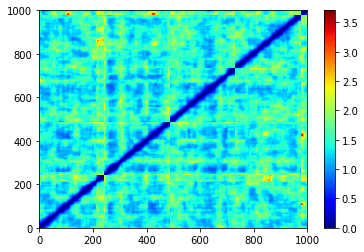

In [68]:
plt.imshow(-np.log(ccm), aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()

array([[1.        , 0.99334744, 0.97497572, ..., 0.16535578, 0.16955164,
        0.17421607],
       [0.99334744, 1.        , 0.99378627, ..., 0.15788209, 0.16186014,
        0.16625717],
       [0.97497572, 0.99378627, 1.        , ..., 0.15349742, 0.1573437 ,
        0.16154618],
       ...,
       [0.16535578, 0.15788209, 0.15349742, ..., 1.        , 0.99737769,
        0.98834568],
       [0.16955164, 0.16186014, 0.1573437 , ..., 0.99737769, 1.        ,
        0.99665597],
       [0.17421607, 0.16625717, 0.16154618, ..., 0.98834568, 0.99665597,
        1.        ]])

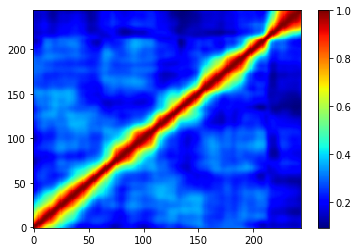